# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\VMCla\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


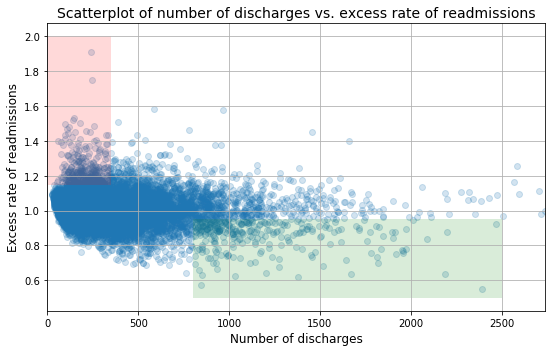

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
</div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A) Do you agree with the above analysis and recommendations? Why or why not?

The analyses above do not include a single p-value showing statistical significance, it is hard to determine anything without that. Additionally, this graph is showing a linear regression (which should have an associater R-squared). If thats the case, I dont see why the author grouped the hospitals into small and large, a categorical variable, which should be tested with chi-squared.

I cant figure out why the author selected the areas within the colored boxes that they did except to point out the outliers that may be driving the trend. They could have grouped these two sets of outliers into two groups and tried to see what defining charateristics they had that made them fall farther away from the mass of hospitals that lie near the expected readmission rate line, but that isnt shown here.

## B) Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1) Setup an appropriate hypothesis test.
#### 2) Compute and report the observed significance value (or p-value).
#### 3) Report statistical significance for α= .01. 

First I will run my own linear regression analysis. The null hypothesis will be that number of discharges has no effect on excess readmission ratio. The alternative hypothesis is that number of discharges does have an affect on excess readmission ratio. I will use 0.01 as my alpha.

In [5]:
df = clean_hospital_read_df
df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


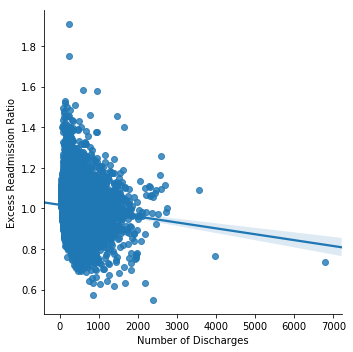

In [6]:
import seaborn as sns
sns.lmplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df)
plt.show()

In [9]:
df=df.dropna(subset=["Excess Readmission Ratio"])

In [10]:
import scipy.stats as stats
x=df["Number of Discharges"]
y=df["Excess Readmission Ratio"]
stats.linregress(x, y)

LinregressResult(slope=-2.9010517330570697e-05, intercept=1.018106147373357, rvalue=-0.097397943510793519, pvalue=1.2225473776734486e-25, stderr=2.7649127349110587e-06)

The p-value (1.22e-25) is below my alpha and therefore we must reject the null hypothesis. The r value is -0.097 which means the r-squared is 0.0094. This is a very low Rsquared value which means that our model explains very little of the variance in the data. The slope of -2.9e-5 seems very shallow to me, but an expert in hospital readmissions may know whether this is enough to be meaningful. 

The study also compared small hospitals (defined as those with less than 100 discharges) to large ones (greater that 1000 discharges). For this, we want a t-test. 

C:\Users\VMCla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\VMCla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(0.8, 1.1)

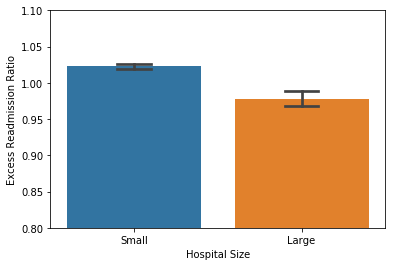

In [28]:
small_hospitals=df[df["Number of Discharges"]<100]
small_hospitals["Hospital Size"]="Small"
large_hospitals=df[df["Number of Discharges"]>1000]
large_hospitals["Hospital Size"]="Large"
hospitals_by_size = pd.concat([small_hospitals, large_hospitals])
sns.barplot(x='Hospital Size', y="Excess Readmission Ratio", data=hospitals_by_size, ci=95, capsize=0.2)
plt.ylim(0.8,1.1)

In [27]:
stats.ttest_ind(small_hospitals["Excess Readmission Ratio"], large_hospitals["Excess Readmission Ratio"])

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

This bar chart makes the difference between the excess readmission rate of small and large hospitals much clearer that the line graph that also contained a large number of hospitals that fell into niether category. The p value of 3.77e-23 is significant. A hospital policy expert may know if the difference between 1.023 and 0.978 is meaningful for readmission rates, though I do not. 

#### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Finding a statistically signifcant difference between two populations does not necessarily mean that there is a practical difference. Consider a crop plant like corn. The plant is grown under two different conditions. Under condition one the corn grown to an average of 9 feet. Under condition two the corn grows to an average of 9 feet 1 inch. There is little enough variation that this is a statistically signifacant difference. However, to the client farmer, this difference is not *meaningful*. It has no practical significance. The difference in overall corn yield from his crop doesnt change enough for it to be of practical significance. 

With this said, experts in the field are the best judge of what is *practically* significant. Without sufficient understanding of the subject matter, a statistician can only provide information on *statistical* significance.

Before making a reccomendation to the client I would have to discuss with an expert in hospital management if a .045 change in excess readmission ratio is *practically* significant.

#### 5) Look at the scatterplot above. 
What are the advantages and disadvantages of using this plot to convey information?

Construct another plot that conveys the same information in a more direct manner.

A scatterplot like the one the author used originally has the advantage of showing all of the data points and the variation. This particular scatter plot did not actually show all the data, however, omitting all hospitals with greater than 2500 discharges. Since these hospitals tended toward lower readmission rates, illustrating the authors point, I'm not sure why they were omitted. If the author chose to consider them outliers, they should have said so, and given a valid reason.

I suppose that the colored boxes were used to show the percentage of small hospitals with rates greater than1 and large hospitals with rates lower than 1.

Ultimately the advantage of this kind of graph is that it shows all of the data and all of its complications. This would be appropriate for a scientific article. However, it makes it hard to see the actual differences. I believe a much simpler bar graph would be better. If one wanted insisted on showing the intermediate hospital data as well, that could still be accommodated in a simple way.

C:\Users\VMCla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0.8, 1.1)

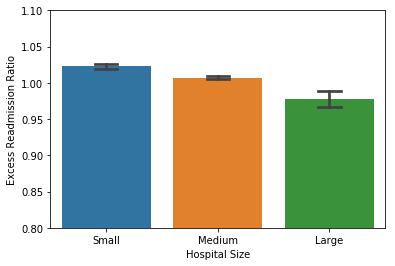

In [37]:
medium_hospitals1=df[df["Number of Discharges"]>100]
medium_hospitals2=medium_hospitals1[medium_hospitals1["Number of Discharges"] <1000]
medium_hospitals2["Hospital Size"]="edium"  
hospitals_by_size2 = pd.concat([small_hospitals, medium_hospitals2, large_hospitals ])
sns.barplot(x='Hospital Size', y="Excess Readmission Ratio", data=hospitals_by_size2, ci=95, capsize=0.2)
plt.ylim(0.8,1.1)